#K-means limitations

One big problem with the K-means algorithm is that although it is guaranteed to converge, it may not
converge to the right solution (i.e., it may converge to a local optimum). This depends on the centroid
initialization.

## 1. First, train K-means on this data with n_clusters=5, n_init=1, init="random", and random_state=1. Repeat this process using the same hyperparameters, but modified random_state=11. Plot the results and explain any potential issues.

In [2]:
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


blob_centers = np.array([[ 0.4,  4.6], [-3 ,  4.6], [-5.6,  3.6],
                         [-5.6,  5.6], [-5.6,  2.6]])
blob_std = np.array([0.8, 0.6, 0.2, 0.2, 0.2])
X, y = make_blobs(n_samples=4000, centers=blob_centers, cluster_std=blob_std,
                  random_state=1)


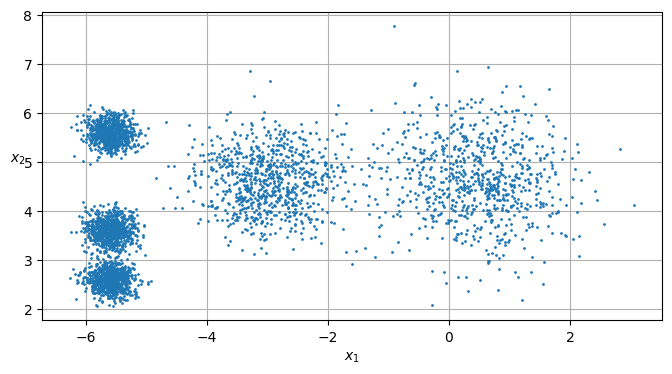

In [3]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

In [8]:
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


blob_centers = np.array([[ 0.4,  4.6], [-3 ,  4.6], [-5.6,  3.6],
                         [-5.6,  5.6], [-5.6,  2.6]])
blob_std = np.array([0.8, 0.6, 0.2, 0.2, 0.2])
X, y = make_blobs(n_samples=4000, centers=blob_centers, cluster_std=blob_std,
                  random_state=11)

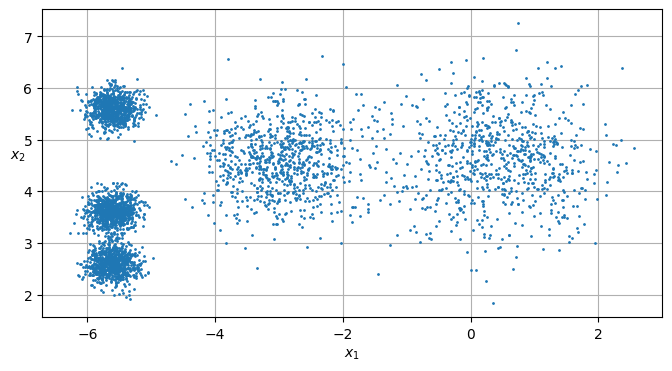

In [9]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

Use the following function to plot your data after you have trained you K-means model.

In [4]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_cntroid(cntroid, weights=None, c_color='w', cs_color='r'):
    if weights is not None:
        cntroid = cntroid[weights > weights.max() / 10]
    plt.scatter(cntroid[:, 0], cntroid[:, 1],
                marker='o', s=37, linewidths=7,
                color=c_color, zorder=12, alpha=0.8)
    plt.scatter(cntroid[:, 0], cntroid[:, 1],
                marker='x', s=2, linewidths=12,
                color=cs_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.15
    maxs = X.max(axis=0) + 0.15
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_cntroid(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

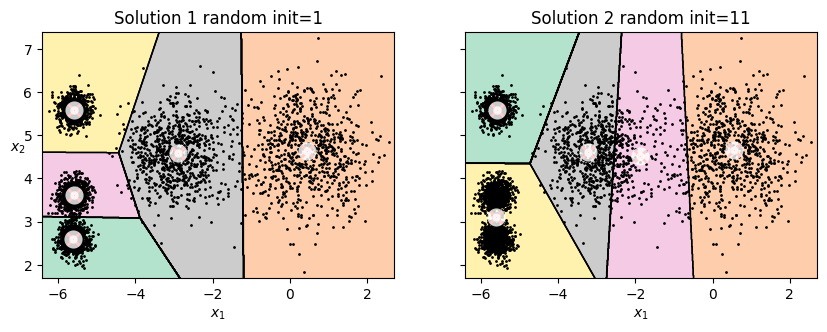

In [12]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None,
                              title2=None):


    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2)

kmeans_rnd_init1 = KMeans(n_clusters=5, n_init=1, init="random", random_state=1)
kmeans_rnd_init1.fit(X)
kmeans_rnd_init2 = KMeans(n_clusters=5, n_init=1, init="random", random_state=11)
kmeans_rnd_init2.fit(X)



plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1 random init=1",
                          "Solution 2 random init=11")

plt.show()

## 2. Suggest a good set of initial centroids and explain why you think it is a good initializiation for this problem.

In [5]:
good_init = 'k-means++'
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42) # random state is set for reproducibility
kmeans.fit(X)

KMeans(n_clusters=5, n_init=1, random_state=42)

## 3. Train your algorithm based on the suggested initialization, plot the results, and discuss what has changed.



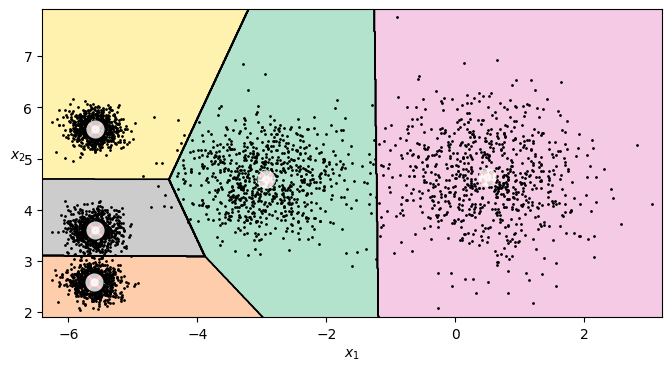

In [7]:
plt.figure(figsize=(8, 4))
# ---- fill here to plot the result
plot_decision_boundaries(kmeans, X, show_centroids=True)
plt.show()